# NCHS - Leading Causes of Death: United States EDA
Data are based on information from all resident death certificates filed in the 50 states and the District of Columbia using demographic and medical characteristics. Age-adjusted death rates (per 100,000 population) are based on the 2000 U.S. standard population. Populations used for computing death rates after 2010 are postcensal estimates based on the 2010 census, estimated as of July 1, 2010. Rates for census years are based on populations enumerated in the corresponding censuses. Rates for non-census years before 2010 are revised using updated intercensal population estimates and may differ from rates previously published.


Dataset : https://catalog.data.gov/dataset/nchs-leading-causes-of-death-united-states

In [73]:
## Load libraries
import pandas as pd
import numpy as np
import calendar
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

warnings.filterwarnings("ignore")

nchs_df = pd.read_csv(r"C:\Users\jki\Downloads\NCHS_-_Leading_Causes_of_Death__United_States.csv")
nchs_df.head(5)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [74]:
# lets check for missing values
missing_values = nchs_df.isna().sum()
print(missing_values)

Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64


In [75]:
# let check for unwanted missing values
nchs_df.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


In [76]:
# lets drop unwanted column
# Drop the '113 Cause Name' column
nchs_df = nchs_df.drop('113 Cause Name', axis=1)
nchs_df.head(5)




,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,Unintentional injuries,United States,169936,49.4
1,2017,Unintentional injuries,Alabama,2703,53.8
2,2017,Unintentional injuries,Alaska,436,63.7
3,2017,Unintentional injuries,Arizona,4184,56.2
4,2017,Unintentional injuries,Arkansas,1625,51.8


In [68]:
# lets check on data type
nchs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


## 1 Whats is the Highest number of deaths for period between 1999 - 2017


In [69]:
nchs_df['Deaths'].max()

2813503

## 2 Whats is the Average number of deaths for period between 1999 - 2017


In [55]:
rounded_average_number_of_deaths = nchs_df['Deaths'].mean()

rounded_average_number_of_deaths = round(rounded_average_number_of_deaths)

print(rounded_average_number_of_deaths)

15460


## 3 Whats is the Total number of deaths for period between 1999 - 2017

In [70]:
rounded_total_number_of_deaths = nchs_df['Age-adjusted Death Rate'].sum()

rounded_total_number_of_deaths = round(rounded_total_number_of_deaths)
print(rounded_total_number_of_deaths)


1386364


## 4 What are the Top Five Most Causes of Death for period between 1999 - 2017

Cause Name
All causes       95457138
Heart disease    24445280
Cancer           21687288
Stroke            5453046
CLRD              5189854
Name: Deaths, dtype: int64


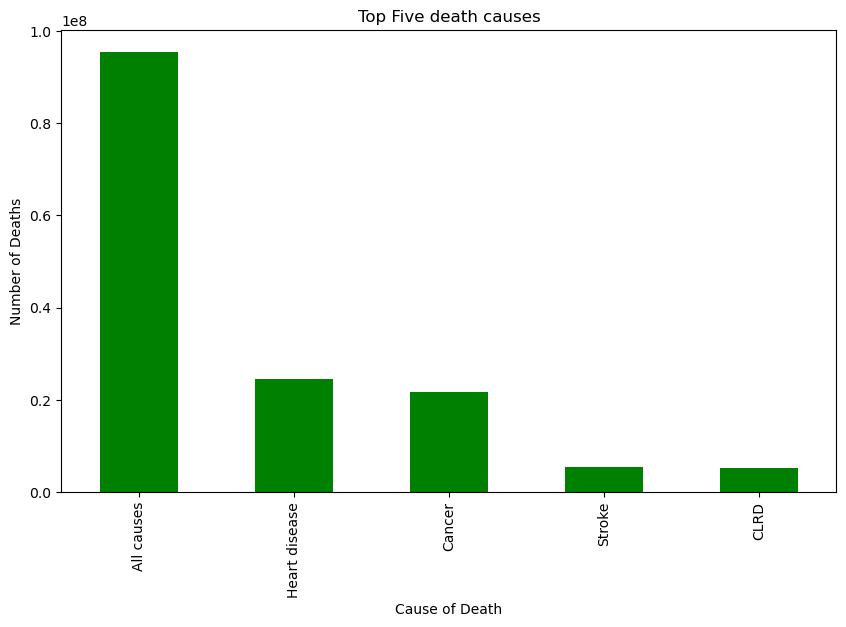

In [71]:
# Group by 'Cause name' and calculate the sum of 'Deaths'
death_cause_count = nchs_df.groupby('Cause Name')['Deaths'].sum()

# Sort the values in descending order and select the top five
top_five_causes = death_cause_count.sort_values(ascending=False).head(5)

# Display the result
print(top_five_causes)

# Plot the top five cuases of death
top_five_causes.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Top Five death causes')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.show()

## 5 What are the Top Five States with the highest death rates for period between 1999 - 2017

State
United States    84009152
California        8169513
Florida           5868231
Texas             5535028
New York          5161056
Name: Deaths, dtype: int64


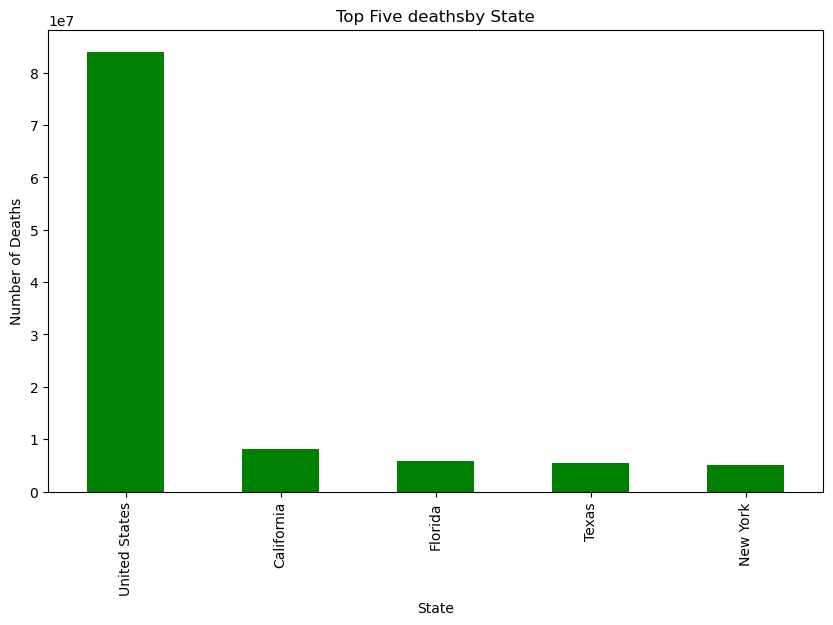

In [72]:
# Group by 'State' and calculate the sum of 'Deaths'
state_death_count = nchs_df.groupby('State')['Deaths'].sum()

# Sort the values in descending order and select the top five
top_five_states = state_death_count.sort_values(ascending=False).head(5)

# Display the result
print(top_five_states)

# Plot the top five states with highest death rate
top_five_states.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Top Five deathsby State')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.show()